**TP4: Discriminative And Generative Models**


 1. Divide the data in two groups: training and test examples.
 2. Parse both the training and test examples to generate both the spam and ham data sets.
 3. Generate a dictionary from the training data.
 4. Extract features from both the training data and test data.
 5. Implement the Na¨ ıve Bayes from scratch, and fit it to the training data.
 6. Make predictions for the test data.
 7. Measure the spam-filtering performance for each approach through the confusion matrix,accuracy, precision, recall, and F1 score.
 8. Plot a graph with true positive rate on the vertical axis and with false positive rate on the horizontal axis.
 9. Discuss your results

**1. Divide the data in two groups: training and test examples.**

data: mails

2 groups: 

-test file name: test-mails

-train file name: train-mails

**2. Parse both the training and test examples to generate both the spam and ham data sets.**

In [38]:
import os
from collections import Counter
import numpy as np

#label initialization
train_labels = np.zeros(702)  # y=0, ham
train_labels[351:702] = 1  # y=1, spam (Fixed indexing from 351:702 instead of 351:701)
test_labels = np.zeros(260)
test_labels[130:260] = 1

**3. Generate a dictionary from the training data.**

In [ ]:
def make_Dictionary(train_dir):
    emails = [os.path.join(train_dir, f) for f in os.listdir(train_dir)]
    all_words = []
    for mail in emails:
        with open(mail) as m:
            for i, line in enumerate(m):
                if i == 2:
                    words = line.split()
                    all_words += words
    dictionary = Counter(all_words)
    # list_to_remove = dictionary.keys()
    # for item in list_to_remove: # this works with python 2.x version
    for item in list(dictionary): # this works with python 3.x version
        if item.isalpha() == False:
            del dictionary[item]
        elif len(item) == 1:
            del dictionary[item]
    dictionary = dictionary.most_common(3000)
    return dictionary

In [11]:
dictionary=make_Dictionary("train-mails")
print(dictionary)

[('order', 1414), ('address', 1293), ('report', 1216), ('mail', 1127), ('send', 1079), ('language', 1072), ('email', 1051), ('program', 1001), ('our', 987), ('list', 935), ('one', 917), ('name', 878), ('receive', 826), ('money', 788), ('free', 762), ('work', 755), ('information', 677), ('business', 654), ('please', 652), ('university', 595), ('us', 564), ('day', 556), ('follow', 544), ('internet', 520), ('over', 511), ('http', 479), ('check', 472), ('call', 469), ('each', 466), ('include', 452), ('com', 448), ('linguistic', 442), ('number', 423), ('want', 420), ('letter', 419), ('need', 418), ('many', 412), ('here', 397), ('market', 395), ('start', 390), ('even', 386), ('fax', 383), ('form', 380), ('most', 377), ('first', 373), ('web', 366), ('service', 363), ('interest', 362), ('software', 352), ('remove', 349), ('read', 347), ('those', 345), ('week', 344), ('every', 332), ('credit', 329), ('ll', 326), ('site', 320), ('much', 318), ('english', 318), ('edu', 318), ('product', 317), ('b

**4. Extract features from both the training data and test data.**

In [32]:
import numpy as np
def extract_features(mail_dir):
    files = [os.path.join(mail_dir, fi) for fi in os.listdir(mail_dir)]
    features_matrix = np.zeros((len(files), 3000))
    docID = 0
    for fil in files:
        with open(fil) as fi:
            for i, line in enumerate(fi):
                if i == 2:
                    words = line.split()
                    for word in words:
                        wordID = 0
                        for i, d in enumerate(dictionary):
                            if d[0] == word:
                                wordID = i
                                features_matrix[docID, wordID] = words.count(word)
            docID = docID + 1
    return features_matrix

In [33]:
train_matrix=extract_features("train-mails")
print(train_matrix)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [34]:
train_matrix.shape

(702, 3000)

In [35]:
test_matrix = extract_features("test-mails")
print(test_matrix)

[[ 1.  0.  0. ...  0.  0.  0.]
 [ 1.  1.  0. ...  0.  0.  0.]
 [ 1.  0.  0. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [17.  2.  0. ...  0.  0.  0.]]


In [15]:
test_matrix.shape

(260, 3000)

**5. Implement the Na¨ ıve Bayes from scratch, and fit it to the training data.**

In [ ]:
import numpy as np

class NaiveBayesClassifier:
    def __init__(self):
        self.prob_spam = 0
        self.prob_ham = 0
        self.word_probs_spam = None
        self.word_probs_ham = None
    
    def fit(self, X, y):
        num_samples, num_features = X.shape
        spam_count = np.sum(y)
        ham_count = num_samples - spam_count
        
        # Prior probabilities
        self.prob_spam = spam_count / num_samples
        self.prob_ham = ham_count / num_samples
        
        # Likelihoods with Laplace smoothing
        alpha = 1  # Laplace smoothing factor
        spam_word_count = np.sum(X[y == 1], axis=0) + alpha
        ham_word_count = np.sum(X[y == 0], axis=0) + alpha
        
        self.word_probs_spam = spam_word_count / (np.sum(spam_word_count))
        self.word_probs_ham = ham_word_count / (np.sum(ham_word_count))
    
    def predict(self, X):
        log_prob_spam = np.log(self.prob_spam) + np.sum(np.log(self.word_probs_spam) * X, axis=1)
        log_prob_ham = np.log(self.prob_ham) + np.sum(np.log(self.word_probs_ham) * X, axis=1)
        return (log_prob_spam > log_prob_ham).astype(int)

[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1]


(260,)

**6. Make predictions for the test data.**

In [ ]:
# Initialisation et entraînement du modèle
nb_classifier = NaiveBayesClassifier()
nb_classifier.fit(train_matrix, train_labels)

test_predictions = nb_classifier.predict(test_matrix)
print(test_predictions)
test_predictions.shape

[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1]


(260,)

**7. Measure the spam-filtering performance for each approach through the confusion matrix,accuracy, precision, recall, and F1 score.**

In [39]:
def calculate_metrics(y_test, y_pred):
    # Confusion Matrix calculation
    TP = np.sum((y_test == 1) & (y_pred == 1))  # True Positives
    FP = np.sum((y_test == 0) & (y_pred == 1))  # False Positives
    TN = np.sum((y_test == 0) & (y_pred == 0))  # True Negatives
    FN = np.sum((y_test == 1) & (y_pred == 0))  # False Negatives
    
    # Accuracy calculation
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    
    # Precision calculation
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0  # Avoid division by zero
    
    # Recall calculation
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0  # Avoid division by zero
    
    # F1 Score calculation
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    # Confusion Matrix
    confusion_matrix = np.array([[TN, FP], [FN, TP]])

    # Print all metrics
    print("Confusion Matrix:")
    print(confusion_matrix)
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1_score:.4f}")
    
    return confusion_matrix, accuracy, precision, recall, f1_score


calculate_metrics(test_labels, test_predictions)


Confusion Matrix:
[[129   1]
 [  9 121]]
Accuracy: 0.9615
Precision: 0.9918
Recall: 0.9308
F1 Score: 0.9603


(array([[129,   1],
        [  9, 121]]),
 0.9615384615384616,
 0.9918032786885246,
 0.9307692307692308,
 0.9603174603174605)

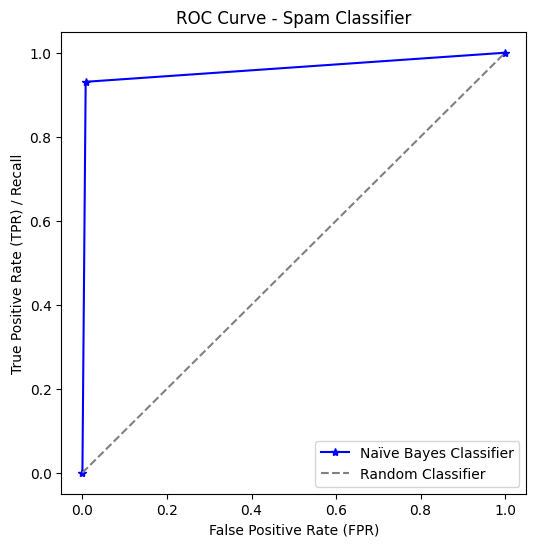

In [45]:
import matplotlib.pyplot as plt

y_test=test_labels
y_pred=test_predictions
# Step 7: Compute ROC Curve
def compute_roc(y_test, y_pred):
    """
    Compute True Positive Rate (TPR) and False Positive Rate (FPR) for ROC curve.
    """
    tp = np.sum((y_pred == 1) & (y_test == 1))
    tn = np.sum((y_pred == 0) & (y_test == 0))
    fp = np.sum((y_pred == 1) & (y_test == 0))
    fn = np.sum((y_pred == 0) & (y_test == 1))

    tpr = tp / (tp + fn) if (tp + fn) > 0 else 0  # True Positive Rate (Recall)
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0  # False Positive Rate

    return fpr, tpr

fpr, tpr = compute_roc(y_test, y_pred)

# Step 8: Plot ROC Curve
plt.figure(figsize=(6, 6))
plt.plot([0, fpr, 1], [0, tpr, 1], color="blue", marker="*", label="Naïve Bayes Classifier")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--", label="Random Classifier")  # Diagonal line

# Labels and legend
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR) / Recall")
plt.title("ROC Curve - Spam Classifier")
plt.legend(loc="lower right")

# Show plot
plt.show()




